In [1]:
pip install torchinfo


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install splitfolders

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
ERROR: Could not find a version that satisfies the requirement splitfolders (from versions: none)
ERROR: No matching distribution found for splitfolders

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
# import splitfolders
from tqdm import tqdm

# full_dataset = torchvision.datasets.ImageFolder(root="dataset/characters/", transform=transform)


In [4]:
#определим устройство, где проводить вычисления (GPU или CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
import os
def get_list(dir):
  fil_names_lst =[]
  for root, dirs, files in os.walk(dir):  
      for filename in files:
          fil_names_lst.append(filename)
  fil_lst = sorted(fil_names_lst)
  return fil_lst



In [6]:
# cd pipka

In [7]:
# # ! unzip newSet.zip
# # # import os

# #Директория, где надо создать папки
# path = 'newSet'
# #название папки для создания
# projectname_lst = classes
# #Меняем директорию на path
# chdir = os.chdir(path)
# #Проверяю текущую директорию, нужно сделать правильную проверку директории через If
# cur_dir = os.getcwd()

# #Делаем функцию на создание папок, типа les_1, les_2 до les_55, через цикл.
# def create_folder():
#     for name in projectname_lst:  #делаем цикл до 55
#         #print (i) # смотрим цикл
#         os.mkdir(name) #создаем папки

# #вызываем функцию 
# create_folder()

In [8]:
# cd ..

In [9]:
# !cd kaggle_simpson_testset && rm -r abraham_grampa_simpson_46-checkpoint.jpg && ls -a

In [10]:
# f_lst = get_list("../newSet")
# # projectname_lst
# # del f_lst[25]
# # 
# # f_lst


In [11]:
# list = get_list("pipka/newSet")


In [12]:
# import shutil
# for name in projectname_lst:
#   dest = '../newSet/' + name 
#   for f_name in f_lst:
#     print(f_name)
#     src = '../newSet/'+ f_name
#     print(src)
# #     if f_name not in list:
#     if name in f_name:
#         shutil.move(src, dest)

In [13]:
#функция для вывода изображений
def image_shower(images, labels, n=4):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
    print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))

#путь до датасета
# PATH_v = "simpsons_dataset/train"
# PATH_train = "simpsons_dataset/val"
# PATH_test = "/content/kaggle_simpson_testset"
# print(len(classes))
# classes = ['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 
#            'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 
#            'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 
#            'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 
#            'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 
#            'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers']

In [14]:
cd ..

/usr/src/app


In [15]:
input_dir = "simpsons_dataset_kaggle"

In [16]:
# зададим какие преобразования необходимо сделать с каждым изображением
transform = transforms.Compose(
    [transforms.Resize((224,224)),  #изменим размер изображений
     transforms.ToTensor(),   #переведем в формат который необходим нейронной сети - тензор
     transforms.Normalize(mean=[0.4620, 0.4079, 0.3531], std=[0.2127, 0.1912, 0.2212])]) # проведем нормализацию изображения

generator = torch.Generator().manual_seed(42)

full_dataset = torchvision.datasets.ImageFolder(root=input_dir, transform=transform)
trainset, valset = torch.utils.data.random_split(full_dataset, [0.9, 0.1], generator=generator)

# testset = torchvision.datasets.ImageFolder(root="newSet", transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=128, num_workers=0, shuffle=True)
# valset = torchvision.datasets.ImageFolder(root=PATH_v, transform=transform)

valloader = torch.utils.data.DataLoader(valset, batch_size=64, num_workers=10, shuffle=True)

# trainset = torchvision.datasets.ImageFolder(root=PATH_train, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, num_workers=10, shuffle=True)

# testset = torchvision.datasets.ImageFolder(root=inp,
#                                            transform=transform)
# testloader = torch.utils.data.DataLoader(testset,
#                                          batch_size=50,
#                                          num_workers=10,
#                                          shuffle=True)
# testloader = torch.utils.data.DataLoader(testset, batch_size=128, num_workers=10, shuffle=True)
# del testset.classes[0]
classes = full_dataset.classes

In [17]:
# !cd pipka/newSet/ && rm -r .ipynb_checkpoints && ls -a

In [18]:
testset = torchvision.datasets.ImageFolder(root="pipka/newSet", transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, num_workers=0, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Real Labels:  charles_montgomery_burns moe_szyslak edna_krabappel chief_wiggum


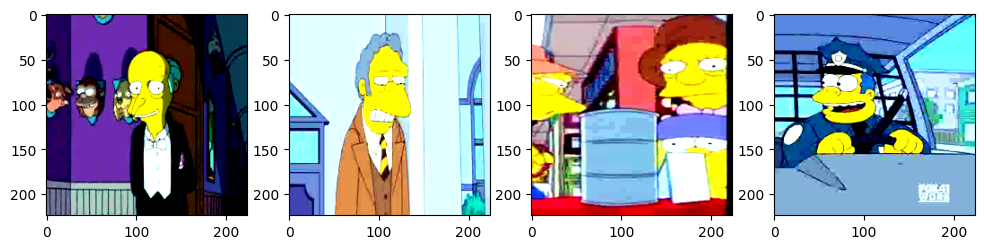

In [19]:
#Проверим как работает наш загрузчик и посмотрим на парочку изображений
images, labels = next(iter(trainloader))
image_shower(images, labels)

In [20]:
class MNet(nn.Module):
    def __init__(self):
        super().__init__()

        def conv_bn(inp, oup, stride):
            return nn.Sequential(
                nn.Conv2d(inp, oup, 3, stride, 1, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True)
            )

        def conv_dw(inp, oup, stride):
            return nn.Sequential(
                nn.Conv2d(inp, inp, 3, stride, 1, groups=inp, bias=False),
                nn.BatchNorm2d(inp),
                nn.ReLU(inplace=True),
    
                nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True),
            )

        self.model = nn.Sequential(
            conv_bn(  3,  32, 2), 
            conv_dw( 32,  64, 1),
            conv_dw( 64, 128, 2),
            conv_dw(128, 128, 1),
            conv_dw(128, 256, 2),
            conv_dw(256, 256, 1),
            conv_dw(256, 512, 2),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 1024, 2),
            conv_dw(1024, 1024, 1),
            nn.AvgPool2d(7),
        )
        self.fc = nn.Linear(1024, 42)

    def forward(self, x):
        x = self.model(x)
        x = x.view(-1, 1024)
        x = self.fc(x)
        return x


In [21]:
from torch.nn.modules import BatchNorm2d
import torch.nn as nn
import torch.nn.functional as F
import torchinfo

net = MNet().to(device)
inf = torchinfo.summary(net,(64,3,224,224),col_names=["input_size", "output_size", "num_params", "kernel_size"],row_settings=["var_names"])
inf

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Kernel Shape
MNet (MNet)                              [64, 3, 224, 224]         [64, 42]                  --                        --
├─Sequential (model)                     [64, 3, 224, 224]         [64, 1024, 1, 1]          --                        --
│    └─Sequential (0)                    [64, 3, 224, 224]         [64, 32, 112, 112]        --                        --
│    │    └─Conv2d (0)                   [64, 3, 224, 224]         [64, 32, 112, 112]        864                       [3, 3]
│    │    └─BatchNorm2d (1)              [64, 32, 112, 112]        [64, 32, 112, 112]        64                        --
│    │    └─ReLU (2)                     [64, 32, 112, 112]        [64, 32, 112, 112]        --                        --
│    └─Sequential (1)                    [64, 32, 112, 112]        [64, 64, 112, 112]        --                        --
│    │    

In [22]:
# weight_0 = [0.043615344193378876, 0.0020064013758180864, 0.02976162040796828, 0.005063774900874218,
#           0.06410930110352075, 0.004681603210242202, 0.05699135336549945, 0.047102660870396024,
#           0.0022452586824630964, 0.022404815363301963, 0.0003821716906320164, 0.02183155782735394,
#           0.0012898294558830554, 0.0012898294558830554, 0.005780346820809248, 0.10729470214493861,
#           0.023790187741843022, 0.05761238236277648, 0.014809153011990636, 0.00014331438398700616,
#           0.06468255863946878, 0.006114747050112263, 0.06167295657574165, 0.0033917737543591457,
#           0.011751779486934505, 0.05154540677399322, 0.0008121148425930349, 0.06936416184971098,
#           0.06945970477236899, 0.017102183155782734, 0.0015286867625280657, 0.003439545215688148,
#           0.05703912482682845, 0.0031051449863851335, 0.0021497157598050925, 0.004251660058281183,
#           0.004920460516887212, 0.0418955715855348, 0.0019108584531600822, 0.002627430373095113,
#           0.0003821716906320164, 0.008646634500549371]



In [23]:
import torch.optim as optim
# weight=weight.to(device)
# weight=torch.FloatTensor(weight_0)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [24]:
# weight

In [25]:
from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassStatScores


In [26]:
def train_step(epoch):
    net.train()
    running_loss = 0.
    
    for images, labels in trainloader:
        images, labels = images.to(device),labels.to(device)
        # Удаляем накопленные ранее градиенты.
        # parameter.grad = 0
        optimizer.zero_grad()
        
        # Делаем проход (forward pass).
        # Состояние модели `train` обеспечивает сохранение промежуточных результатов вычислений.
        # Эти сохраненные значения будут использованы ниже для вычисления градиента функции потерь.
        output = net(images)
        
        # Вычисляем функцию потерь на основе предсказания модели.
        loss = criterion(output, labels)

        # Вычисляем градиент: направление, в котором функция потерь возрастает максимально быстро.
        # parameter.grad += dloss / dparameter
        loss.backward()

        # parameter += -lr * parameter.grad
        # 
        # PyTorch SGD:
        # velocity = momentum * velocity + parameter.grad
        # parameter += - lr * velocity
        optimizer.step()
        
        # Накапливаем статистику.
        running_loss += loss
    
    with torch.no_grad():
        train_loss = running_loss / len(trainloader)
    print(epoch,"\n train_loss: ",train_loss.item())
    return train_loss.item()


In [27]:
def valid_step(epoch):
    net.eval()
    
    acc = MulticlassAccuracy(num_classes=len(classes), average="micro")
    recall = MulticlassRecall(num_classes=len(classes), average="macro")
    precision = MulticlassPrecision(num_classes=len(classes), average="macro")
    acc.to(device)
    recall.to(device)
    precision.to(device)

    # correct_total = 0.
    running_loss = 0. 
    with torch.no_grad():
        for images, labels in valloader:
            images, labels = images.to(device),labels.to(device)
            output = net(images)
            acc.update(output, labels)
            recall.update(output, labels)
            precision.update(output, labels)


            # prediction = output.argmax(dim=1)
            # correct_total += prediction.eq(labels.view_as(prediction)).sum()
            
            loss = criterion(output, labels)
            running_loss += loss
        f1 = 2 *  ((recall.compute().item() * precision.compute().item()) / (recall.compute().item() + precision.compute().item())) *100
        valid_loss = running_loss / len(valloader)
        # accuracy = correct_total / len(valloader.dataset)
        print(epoch, "\n valid_loss: ",valid_loss.item()," acc: ",acc.compute().item()," recall: ",recall.compute().item(),
             " precision: ", precision.compute().item())
        print("f1: ",f1)
        return valid_loss.item(), acc.compute().item(),recall.compute().item(),precision.compute().item()
train_losses = []
valid_losses = []
valid_accs = []
valid_recs = []
valid_precs = []
lrs = []

In [28]:
# from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau

epochs = 25
# scheduler = StepLR(optimizer, step_size=10, gamma=0.7)
# scheduler = MultiStepLR(optimizer, milestones=[15,20], gamma=0.1)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, threshold=1e-3, cooldown=1)

# scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10, threshold=1e-3, cooldown=1)

# scheduler = ExponentialLR(optimizer, gamma=0.9)
# lmbda = lambda epoch: 0.95
# scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10, threshold=1e-10, cooldown=1)
# scheduler = ReduceLROnPlateau(optimizer, 'min',patience=3,threshold=0.001,eps=0.1)
# scheduler = MultiplicativeLR(optimizer, lr_lambda=lmbda)
# scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
for _ in (pbar := tqdm(range(epochs))):
    train_loss = train_step(_)
    valid_loss, valid_acc, valid_rec,valid_prec= valid_step(_)
    scheduler.step(valid_loss)
    
    # lr = StepLR.get_last_lr(valid_loss)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)
    valid_recs.append(valid_rec)
    valid_precs.append(valid_prec)
    
    # lrs.append(lr)
    
    pbar.set_description(f'Avg. train/valid loss: {train_loss:.4f}/{valid_loss:.4f}')

  0%|          | 0/25 [00:00<?, ?it/s]

0 
 train_loss:  2.7662241458892822


Avg. train/valid loss: 2.7662/2.2426:   4%|▍         | 1/25 [00:25<10:20, 25.86s/it]

0 
 valid_loss:  2.242610216140747  acc:  0.40735435485839844  recall:  0.16224442422389984  precision:  0.19039286673069
f1:  17.519520386195524
1 
 train_loss:  1.3564798831939697


Avg. train/valid loss: 1.3565/1.6605:   8%|▊         | 2/25 [00:50<09:43, 25.38s/it]

1 
 valid_loss:  1.6604899168014526  acc:  0.5835720896720886  recall:  0.27293258905410767  precision:  0.3301999270915985
f1:  29.88474956797574
2 
 train_loss:  0.7810462713241577


Avg. train/valid loss: 0.7810/0.9662:  12%|█▏        | 3/25 [01:15<09:14, 25.21s/it]

2 
 valid_loss:  0.9662314653396606  acc:  0.7531040906906128  recall:  0.3710733652114868  precision:  0.4002338647842407
f1:  38.510238540849684
3 
 train_loss:  0.5573391914367676


Avg. train/valid loss: 0.5573/0.7574:  16%|█▌        | 4/25 [01:40<08:47, 25.14s/it]

3 
 valid_loss:  0.7573555111885071  acc:  0.8008595705032349  recall:  0.45126694440841675  precision:  0.48352277278900146
f1:  46.68383492333531
4 
 train_loss:  0.39122486114501953


Avg. train/valid loss: 0.3912/0.7977:  20%|██        | 5/25 [02:05<08:22, 25.10s/it]

4 
 valid_loss:  0.7977434992790222  acc:  0.7970391511917114  recall:  0.4604359269142151  precision:  0.5366483330726624
f1:  49.56294720137929
5 
 train_loss:  0.2903784215450287


Avg. train/valid loss: 0.2904/0.7861:  24%|██▍       | 6/25 [02:30<07:54, 24.97s/it]

5 
 valid_loss:  0.7860561013221741  acc:  0.8209168910980225  recall:  0.528654932975769  precision:  0.5757997035980225
f1:  55.122110702052815
6 
 train_loss:  0.22157101333141327


Avg. train/valid loss: 0.2216/0.6079:  28%|██▊       | 7/25 [02:55<07:29, 24.99s/it]

6 
 valid_loss:  0.607919454574585  acc:  0.84670490026474  recall:  0.5704123377799988  precision:  0.5979313850402832
f1:  58.384777101305914
7 
 train_loss:  0.16438080370426178


Avg. train/valid loss: 0.1644/0.5985:  32%|███▏      | 8/25 [03:20<07:03, 24.91s/it]

7 
 valid_loss:  0.5985153913497925  acc:  0.8591213226318359  recall:  0.6581423282623291  precision:  0.6231576204299927
f1:  64.01723618310886
8 
 train_loss:  0.1233103945851326


Avg. train/valid loss: 0.1233/0.5258:  36%|███▌      | 9/25 [03:45<06:37, 24.86s/it]

8 
 valid_loss:  0.5257506966590881  acc:  0.8806112408638  recall:  0.6384498476982117  precision:  0.660728394985199
f1:  64.93981030299327
9 
 train_loss:  0.09448166191577911


Avg. train/valid loss: 0.0945/0.5686:  40%|████      | 10/25 [04:10<06:14, 25.00s/it]

9 
 valid_loss:  0.5685698986053467  acc:  0.8791785836219788  recall:  0.6829795837402344  precision:  0.6406097412109375
f1:  66.11165051642071
10 
 train_loss:  0.07701975107192993


Avg. train/valid loss: 0.0770/0.5798:  44%|████▍     | 11/25 [04:35<05:49, 24.95s/it]

10 
 valid_loss:  0.5797890424728394  acc:  0.8748806118965149  recall:  0.6946330070495605  precision:  0.698622465133667
f1:  69.66220243696351
11 
 train_loss:  0.05105074495077133


Avg. train/valid loss: 0.0511/0.4377:  48%|████▊     | 12/25 [05:00<05:23, 24.87s/it]

11 
 valid_loss:  0.4377269148826599  acc:  0.9021012187004089  recall:  0.7117318511009216  precision:  0.7047455310821533
f1:  70.82214622010453
12 
 train_loss:  0.031737715005874634


Avg. train/valid loss: 0.0317/0.5052:  52%|█████▏    | 13/25 [05:24<04:56, 24.75s/it]

12 
 valid_loss:  0.5052444338798523  acc:  0.8925501704216003  recall:  0.6658142805099487  precision:  0.7291827201843262
f1:  69.60592287412607
13 
 train_loss:  0.02675444632768631


Avg. train/valid loss: 0.0268/0.4230:  56%|█████▌    | 14/25 [05:48<04:31, 24.67s/it]

13 
 valid_loss:  0.4230439066886902  acc:  0.9097421169281006  recall:  0.7662371397018433  precision:  0.7750974297523499
f1:  77.06418182445643
14 
 train_loss:  0.01578878052532673


Avg. train/valid loss: 0.0158/0.4584:  60%|██████    | 15/25 [06:13<04:06, 24.64s/it]

14 
 valid_loss:  0.4583631157875061  acc:  0.9106972217559814  recall:  0.7350003719329834  precision:  0.7185713648796082
f1:  72.66930239095556
15 
 train_loss:  0.016073841601610184


Avg. train/valid loss: 0.0161/0.4666:  64%|██████▍   | 16/25 [06:38<03:41, 24.60s/it]

15 
 valid_loss:  0.46657341718673706  acc:  0.9087870121002197  recall:  0.7129135727882385  precision:  0.7528774738311768
f1:  73.23507275865201
16 
 train_loss:  0.010194284841418266


Avg. train/valid loss: 0.0102/0.4447:  68%|██████▊   | 17/25 [07:02<03:17, 24.64s/it]

16 
 valid_loss:  0.4447058141231537  acc:  0.910219669342041  recall:  0.7758777141571045  precision:  0.7400902509689331
f1:  75.7561565153513
17 
 train_loss:  0.00725453021004796


Avg. train/valid loss: 0.0073/0.4306:  72%|███████▏  | 18/25 [07:27<02:52, 24.63s/it]

17 
 valid_loss:  0.4305824339389801  acc:  0.910219669342041  recall:  0.7417897582054138  precision:  0.7286676168441772
f1:  73.51701375127972
18 
 train_loss:  0.004353496711701155


Avg. train/valid loss: 0.0044/0.4172:  76%|███████▌  | 19/25 [07:51<02:27, 24.59s/it]

18 
 valid_loss:  0.4171697199344635  acc:  0.9202483296394348  recall:  0.805494487285614  precision:  0.7810260057449341
f1:  79.30715610896723
19 
 train_loss:  0.003776916768401861


Avg. train/valid loss: 0.0038/0.4079:  80%|████████  | 20/25 [08:16<02:02, 24.55s/it]

19 
 valid_loss:  0.40794727206230164  acc:  0.9212034344673157  recall:  0.805119514465332  precision:  0.7892982363700867
f1:  79.713037878769
20 
 train_loss:  0.003376949345692992


Avg. train/valid loss: 0.0034/0.4074:  84%|████████▍ | 21/25 [08:41<01:38, 24.63s/it]

20 
 valid_loss:  0.40741854906082153  acc:  0.9207258820533752  recall:  0.8138967752456665  precision:  0.7863429188728333
f1:  79.98826279089548
21 
 train_loss:  0.0029261375311762094


Avg. train/valid loss: 0.0029/0.4066:  88%|████████▊ | 22/25 [09:05<01:13, 24.66s/it]

21 
 valid_loss:  0.40658482909202576  acc:  0.9197707772254944  recall:  0.8127710819244385  precision:  0.794813871383667
f1:  80.3692182915379
22 
 train_loss:  0.002757085021585226


Avg. train/valid loss: 0.0028/0.4060:  92%|█████████▏| 23/25 [09:30<00:49, 24.76s/it]

22 
 valid_loss:  0.4059589207172394  acc:  0.9183381199836731  recall:  0.8042584657669067  precision:  0.7789650559425354
f1:  79.14097184482726
23 
 train_loss:  0.0027909802738577127


Avg. train/valid loss: 0.0028/0.4068:  96%|█████████▌| 24/25 [09:56<00:24, 24.96s/it]

23 
 valid_loss:  0.4068091809749603  acc:  0.9207258820533752  recall:  0.8075311779975891  precision:  0.782282829284668
f1:  79.47065150588763
24 
 train_loss:  0.0022573848254978657


Avg. train/valid loss: 0.0023/0.4041: 100%|██████████| 25/25 [10:21<00:00, 24.87s/it]

24 
 valid_loss:  0.40412062406539917  acc:  0.9188156723976135  recall:  0.8039529919624329  precision:  0.7778850197792053
f1:  79.07042116982484


Text(0, 0.5, 'Loss')

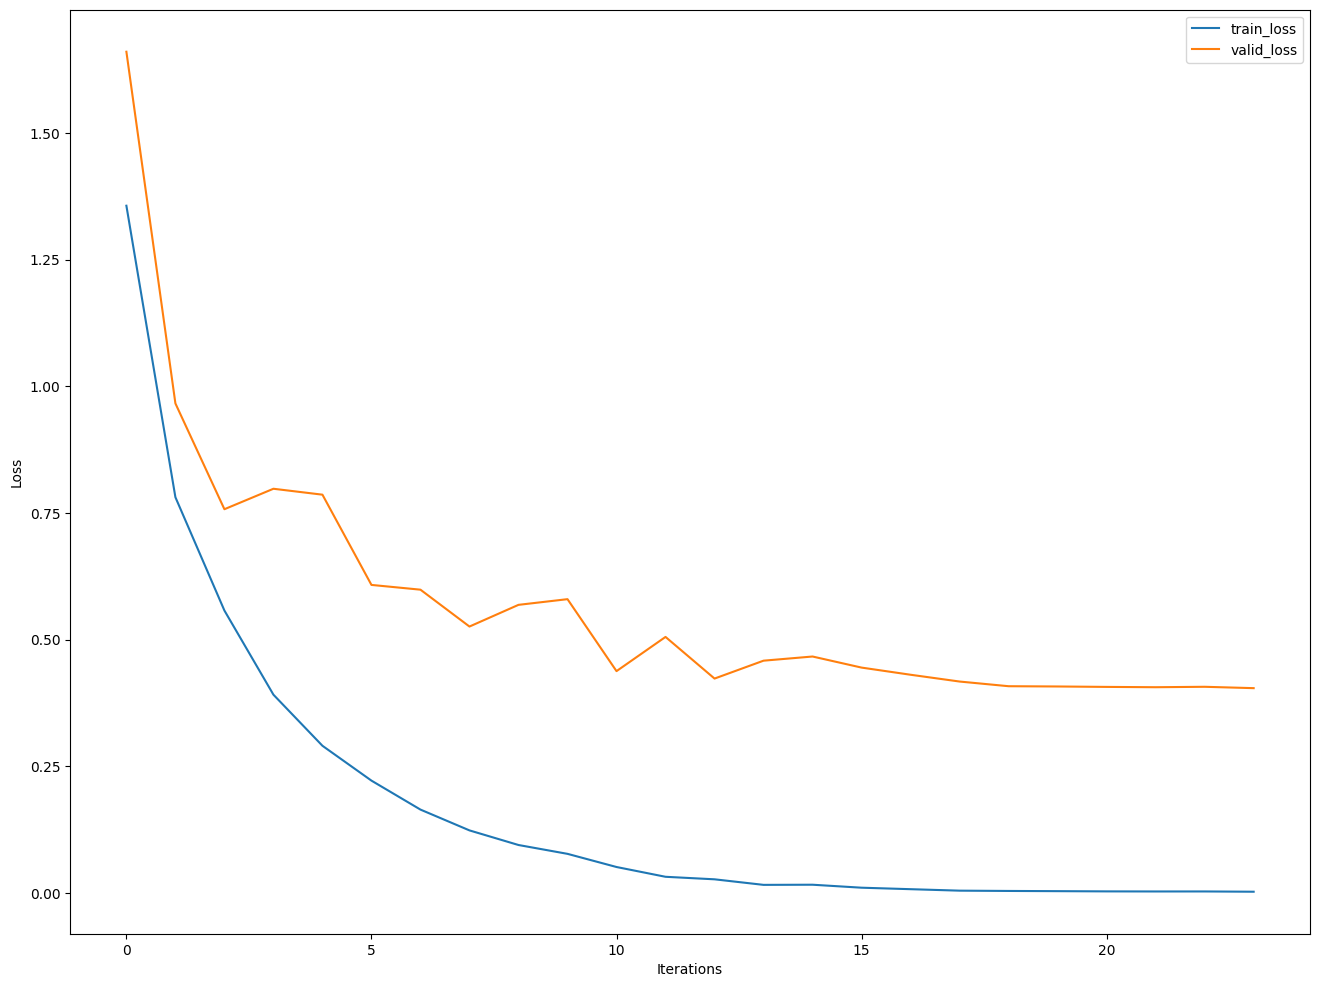

In [29]:
fig = plt.figure(figsize=(16, 12))

plt.plot(train_losses[1:], label='train_loss')
plt.plot(valid_losses[1:], label='valid_loss')
# plt.plot(lr[1:], label='lr')


plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

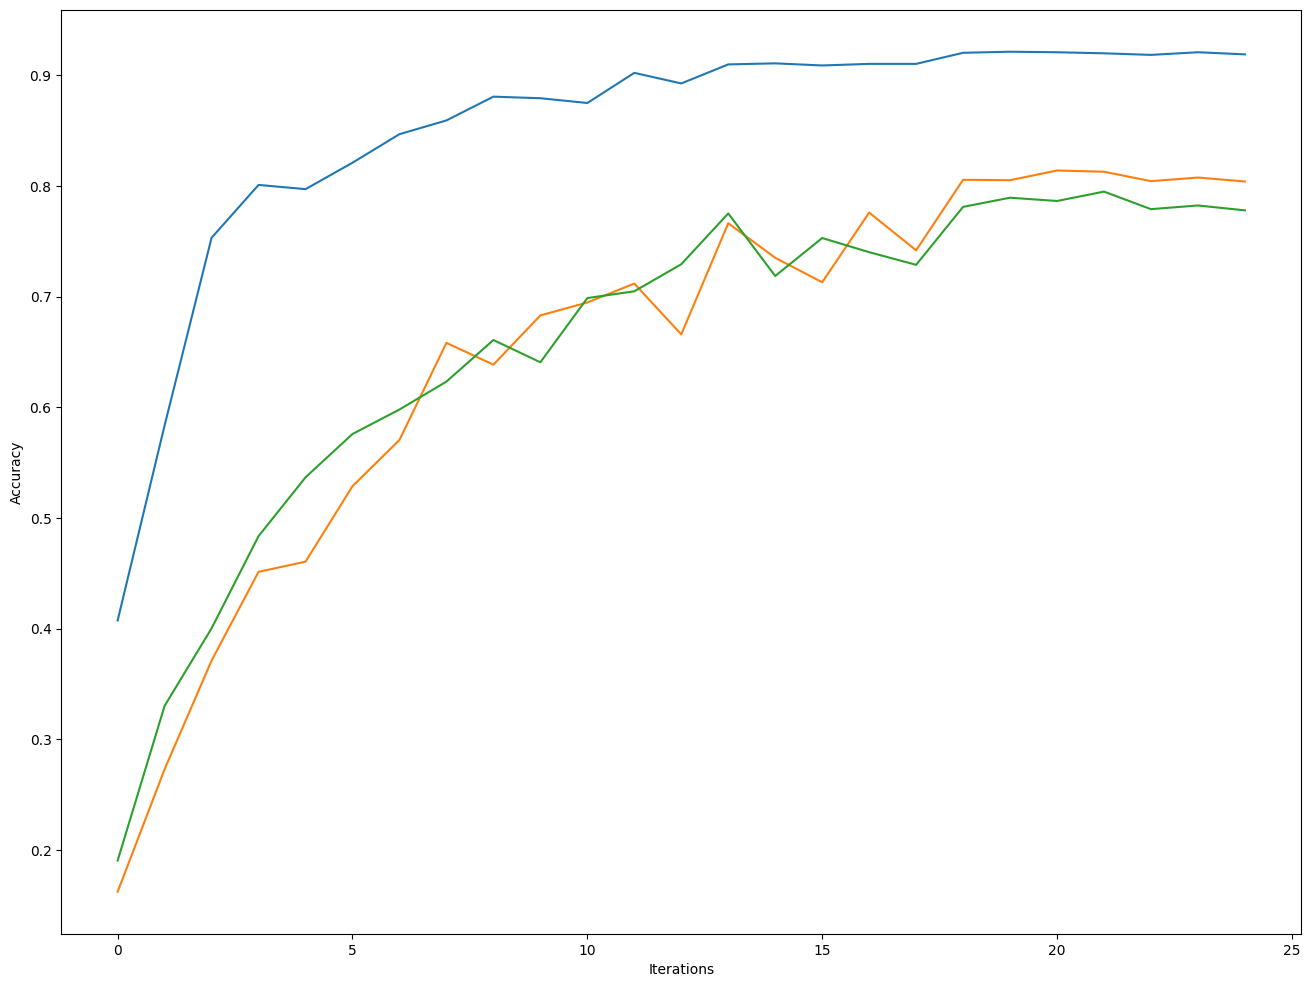

In [30]:
fig = plt.figure(figsize=(16, 12))

# plt.plot(valid_accs)
plt.plot(valid_accs, label='valid_acc')
plt.plot(valid_recs, label='valid_rec')
plt.plot(valid_precs, label='valid_prec')
plt.plot(lrs, label='lr')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Real Labels:  edna_krabappel mayor_quimby ned_flanders lisa_simpson


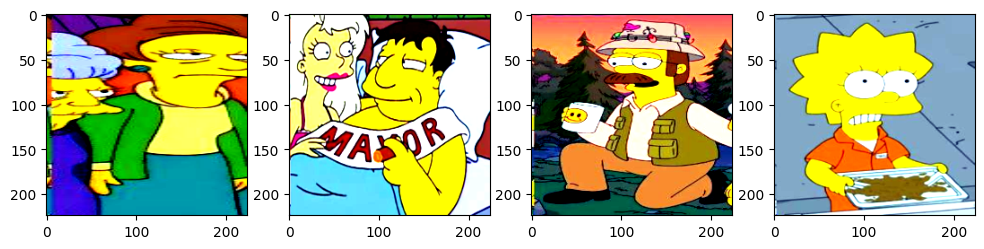

In [40]:
images, labels = next(iter(testloader))
image_shower(images, labels)

In [41]:
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


Predicted:  charles_montgomery_burns mayor_quimby ned_flanders lisa_simpson


In [39]:
stats = MulticlassStatScores(num_classes=len(classes), average=None)
stats.to(device)
classes_amount = len(classes)
with torch.no_grad():
        net.eval()
        for images, labels in testloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = net(images)
            stats.update(outputs, labels)
tp, fp, tn, fn = stats._final_state()
def saveDivide(x, y): return torch.nan_to_num(x/y)

accuracy = saveDivide((tp+tn), (tp+fp+tn+fn))
recall = saveDivide(tp, (tp+fn))
precision = saveDivide(tp, (tp+fp))
accuracy_per_class = {classname: val.item()
                            for classname, val in zip(classes, accuracy)}
recall_per_class = {classname: val.item()
                            for classname, val in zip(classes, recall)}
precision_per_class = {classname: val.item()
                            for classname, val in zip(classes, precision)}
classes_amount_correct = len(full_dataset.classes)

classes_correct = full_dataset.classes
def slice_dict(dict, sliceBy): return {k: dict[k] for k in dict if k in sliceBy}
accuracy_per_class = slice_dict(accuracy_per_class, classes_correct)
recall_per_class = slice_dict(recall_per_class, classes_correct)
precision_per_class = slice_dict(precision_per_class, classes_correct)

total_rec = sum(recall)/classes_amount_correct
total_prec = sum(precision)/classes_amount_correct
total_acc = sum(accuracy)/classes_amount
f1 = 2 * (total_prec * total_rec)/(total_rec + total_prec)
# total_rec = sum(recall)/classes_amount
# total_prec = sum(precision)/classes_amount
print("accuracy: ",total_acc.item()*100,"%")
print("F1: ",f1.item() * 100,"%")
# print(total_prec)
# classes_amount_correct

accuracy:  98.46271276473999 %
F1:  70.85623145103455 %
